In [1]:
import pandas as pd

names1880 = pd.read_csv("./datasets/babynames/yob1880.txt", names = ["name", "sex", "births"])

In [2]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
names1880.groupby("sex").births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [8]:
years = range(1880, 2011)

pieces = []
columns = ["name", "sex", "births"]

for year in years:
    path = "./datasets/babynames/yob%d.txt"%(year)
    data = pd.read_csv(path, names = columns)
    data["year"] = year
    pieces.append(data)

names = pd.concat(pieces, ignore_index = True)

In [9]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [11]:
total_births = names.pivot_table("births", index="year", columns = "sex", aggfunc=sum)

In [12]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

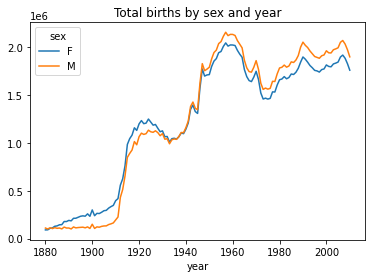

In [13]:
total_births.plot(title = "Total births by sex and year")